# Convolutional Neural Networks 🥅

---
## Architechure of a Neural network 🚧
1. **Layer 1** : <mark style="background: #D2B3FFA6;">*conv2D*.</mark> : (For convolutional 2 Dimensional Data like Images , with height and width)
2. **Layer 2** : <mark style="background: #FFB86CA6;">Convolutional Layer</mark> () : Extrach and learn most important features from the target images 
3. **Layer 3** : <mark style="background: #FFF3A3A6;">Hidden Activation (ReLu)</mark> : Adds non linearity to learned features (non straight lines )
4. **Layer 4** : <mark style="background: #BBFABBA6;">Pooling Layer </mark>: Reduce the dimensionality of learned images (*Reduces the calculation the CNN has to make )

		Pooling layer: learns from already learned features , like for a example in a car if the learning feature are , like straight line is a hodd , circular lines are wheels , 
		
5. **Layer 5** : <mark style="background: #21D99A;">Fully Connected Layer (Output Layer)</mark> : Further refines the learned features from the convution layers 
6. **Layer 6** : <mark style="background: #ABF7F7A6;">Output activation </mark>( Adds on non linearities to the output layer )


# Construction 🚧 100

#### Convolution :

A convolution is a filter that is used to multiply a pixel with its neighbours  to get new values for the pixel


![[Pasted image 20250123233855.png | 400]]

Original Matrix and the Filter matrix in the <mark style="background: #ADCCFFA6;">blue</mark> : multiplication of these will give new vlaue for every pixel , and we will have a filtered image 
![[Pasted image 20250123234020.png | 500]]
Another picture multiplied with a convolution filer producing a new image


```python
tf.keras.layers.Conv2D(64, (3, 3), activation='relu',

input_shape=(28, 28, 1)),

```

In this case we want ot learn 64 convolutions , (3, 3 ) indicates the soze of the filter 

#### Pooling :

Pooling is the process of eliminating pixels in your image while maintaining the semantics of the content within the image
![[Pasted image 20250123234217.png | 400]]
Demonstration of pooling

- Box on the left : pixels in a monochrome image
- Group them into 2x2 arrays
- In this case 16 pixels are grouped into 4 2x2 arrays 
- These 4 groups are called **<mark style="background: #FFB8EBA6;">Pools</mark>

In [7]:
# Get the data : the data is from Food 101 dataset , which is (101 different classes of food  : but there is a modification , here in this dataset , we are working with only 2 classes , PIZZA and STEAK)
# Inspecting the data ===> the data is in the form of images , so we need to load the images and preprocess them
# Visualizing samples of the data 

In [2]:
import os 
# Walk through the pizze_steak directory and list the number of files 
for dirpath, dirnames , filenames in os.walk("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak") :
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in the '{dirpath}'")

There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/steak'
There are 0 directories and 250 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/pizza'
There are 2 directories and 0 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/steak'
There are 0 directories and 750 images in the '/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/pizza'


In [3]:
# Visualizing the data
import matplotlib as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pathlib
import numpy as np
import tensorflow as tf

# Set up the directory
data_dir = pathlib.Path("/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Create a list of class_names from the subdirectories
print(class_names)



['test' 'train']


In [4]:
# Visualizing the sample data

def view_random_image(traget_dir , target_class) :
    # Set up the target directory , (we will view images from here)
    target_folder = traget_dir + target_class
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder) , 1)
    #Read an image and plot it using the matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image shape : {img.shape}")
    return img

Image shape : (512, 512, 3)


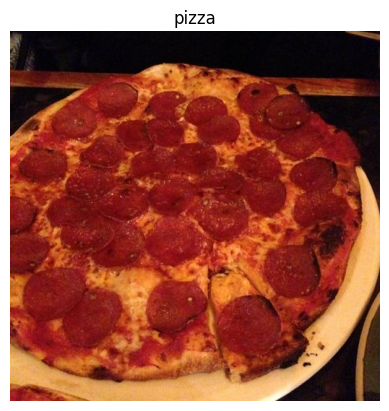

In [5]:
# View thw random image from the pizza directory
img = view_random_image(traget_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/" , target_class = "pizza")

In [6]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  8,   3,   0],
        [ 14,   9,   6],
        [ 17,  11,  13],
        ...,
        [ 33,  14,  16],
        [ 35,  16,  18],
        [ 40,  21,  23]],

       [[ 12,   7,   4],
        [ 16,  11,   8],
        [ 18,  12,  12],
        ...,
        [ 24,   4,   5],
        [ 27,   7,   8],
        [ 30,  10,  11]],

       [[ 14,   6,   3],
        [ 16,   8,   6],
        [ 20,  11,  12],
        ...,
        [ 24,   0,   0],
        [ 29,   3,   2],
        [ 33,   7,   6]],

       ...,

       [[170,  30,  43],
        [168,  31,  41],
        [168,  31,  39],
        ...,
        [ 31,  16,  23],
        [ 25,   9,  22],
        [ 28,  12,  25]],

       [[169,  31,  44],
        [168,  31,  41],
        [167,  30,  37],
        ...,
        [ 25,  12,  21],
        [ 24,  10,  25],
        [ 27,  13,  28]],

       [[167,  29,  42],
        [164,  27,  37],
        [161,  26,  32],
        ...,
        [ 26,  13,  2

- A few more normal model , not CNNs for the comparision 


In [8]:
	
# Preprocessing the data
# The data is in the form of images , we need to convert them into tensors , so that we can use them in the model   
# Scaling the features  == > NORMALIZATION 
# convert the pixel values between 0 and 1
img / 255

array([[[0.03137255, 0.01176471, 0.        ],
        [0.05490196, 0.03529412, 0.02352941],
        [0.06666667, 0.04313725, 0.05098039],
        ...,
        [0.12941176, 0.05490196, 0.0627451 ],
        [0.1372549 , 0.0627451 , 0.07058824],
        [0.15686275, 0.08235294, 0.09019608]],

       [[0.04705882, 0.02745098, 0.01568627],
        [0.0627451 , 0.04313725, 0.03137255],
        [0.07058824, 0.04705882, 0.04705882],
        ...,
        [0.09411765, 0.01568627, 0.01960784],
        [0.10588235, 0.02745098, 0.03137255],
        [0.11764706, 0.03921569, 0.04313725]],

       [[0.05490196, 0.02352941, 0.01176471],
        [0.0627451 , 0.03137255, 0.02352941],
        [0.07843137, 0.04313725, 0.04705882],
        ...,
        [0.09411765, 0.        , 0.        ],
        [0.11372549, 0.01176471, 0.00784314],
        [0.12941176, 0.02745098, 0.02352941]],

       ...,

       [[0.66666667, 0.11764706, 0.16862745],
        [0.65882353, 0.12156863, 0.16078431],
        [0.65882353, 0

# End to End Model :

-Building a Convolutional Neural network model , to find the Patterns in the images
1. Load the images
2. Preprocess the images
3. Build a CNN to find pattern in the images
4. Compile the CNN
5. Fit the CNN ti the data
The imageDataGenerator , will generate the batches of image data ,--> with real time data augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed

tf.random.set_seed(42)

# Preprocessing the data , get all the pixel values between 0 and 1 , Normalizing 
train_datagen = ImageDataGenerator(rescale = 1./255) 
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Set up path to data directories
train_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/train/"
test_dir = "/Users/akhilkumar/Desktop/Tesorflow - Expert/pizza_steak/test/"

# Import the data from directories and turn into batches
train_data = train_datagen.flow_from_directory(directory = train_dir , 
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                                class_mode = "binary",
                                                 seed = 42 )


valid_data = valid_datagen.flow_from_directory(directory = test_dir ,
                                               batch_size = 32,
                                               target_size = (224 , 224),
                                               class_mode = "binary",
                                               seed = 42)

In [ ]:
# Build a CNN model , (same as tiny VGG)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size= 3,
                           activation = "relu",
                           input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10 , 3, activation = "relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                              padding= "valid"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.Conv2D(10 , 3 , activation = "relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1 , activation = "sigmoid")

])

In this the len(train_data) = 47 , that is 1500 classes divided by batch of 32 1500/32 = 47

In [ ]:
# Compile the cnn

model_1.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model 

history_1 = model_1.fit(train_data, 
                        epochs = 5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps = len(valid_data))

In [ ]:
model_1.summary()